# Senior Citizen identification model 

# Importing necessary libraries

In [1]:
import tensorflow as tf
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

# Extracting Data from Dataset

In [2]:
fldr = "./UTKFace"
import os 
files = os.listdir(fldr)

In [3]:
ages=[]
genders=[]
images=[]

for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

# Creating list of agwe and gender from dataset

In [4]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

# Sample 

10
0


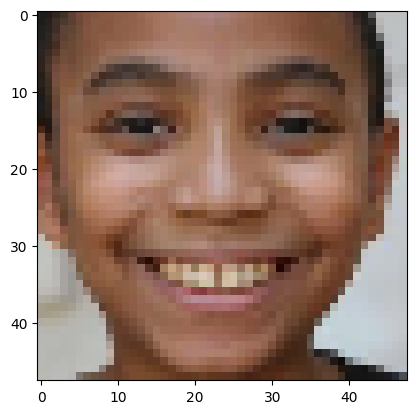

In [5]:
plt.imshow(images[87])
print(ages[87])
print(genders[87])

# Saving image array, Gender array, Age array in the system 

In [6]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [7]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

# Visuailzing the number of male and female

In [8]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


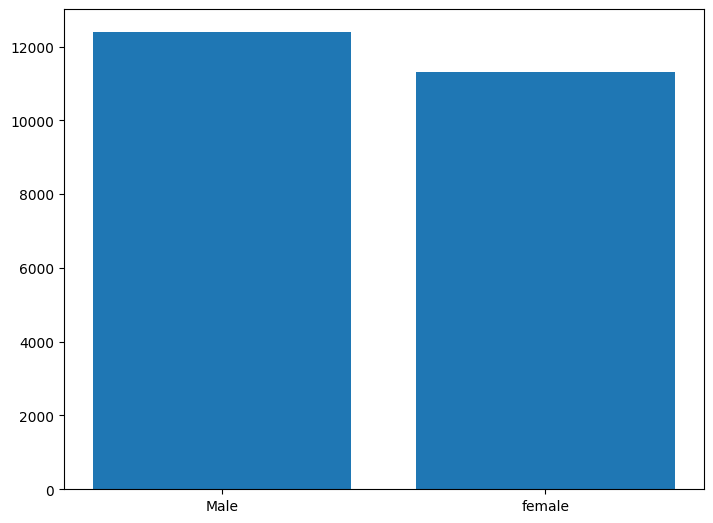

In [9]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','female']
values =[12391,11317]
ax.bar(gender,values)
plt.show()

# Visualizng the number of sample in each range

In [10]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


# Converting Age count in the list

In [11]:
val=values.tolist()
cnt=counts.tolist()

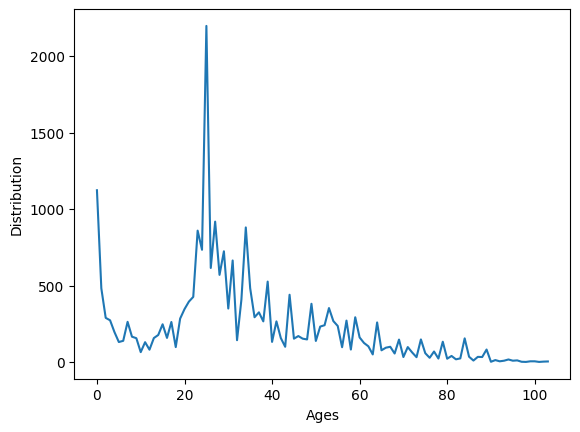

In [12]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

# Difining labels for output

In [13]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [14]:
images_f_2=images_f/255
images_f_2.shape

(23708, 48, 48, 3)

In [15]:
labels_f=np.array(labels)

# Splitting the dataset into train and test set

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(images_f_2,labels_f,test_size=0.25)
y_train[0:5]

array([[14,  0],
       [24,  1],
       [23,  1],
       [34,  1],
       [ 1,  1]])

# spliting Y_test, Y_train for better understanding 

In [17]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [18]:
y_train_2[0][0:5]

array([0, 1, 1, 1, 1])

In [19]:
y_train_2[1][0:5]

array([14, 24, 23, 34,  1])

# Defining the model

In [20]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters, kernel_size=(3,3), padding="same", strides=(1,1), kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return(x)

In [21]:
def model(input_shape):
    inputs=Input(shape=input_shape)
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    conv_5=Convolution(maxp_4,512)
    maxp_5=MaxPooling2D(pool_size=(2,2))(conv_5)
    flatten=Flatten()(maxp_5)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=['binary_crossentropy',"mae"],optimizer="Adam",metrics=["accuracy","accuracy"])
    return model

In [22]:
Model=model((48,48,3))

In [23]:
Model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,634,370 (6.23 MB)

 Trainable params: 1,634,370 (6.23 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [25]:

fle_s = 'Age_Sex_Detection_2.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [26]:
History=Model.fit(X_train,y_train_2,batch_size=64,validation_data=(X_test,y_test_2),
                  epochs=250,callbacks=callback_list)

Epoch 1/250


c:\Users\anshu yadav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 48, 48, 3))
  warnings.warn(msg)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - age_out_accuracy: 0.0437 - age_out_loss: 18.4065 - loss: 19.5316 - sex_out_accuracy: 0.5133 - sex_out_loss: 0.7307
Epoch 1: val_loss improved from inf to 17.88856, saving model to Age_Sex_Detection_2.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 44s 136ms/step - age_out_accuracy: 0.0437 - age_out_loss: 18.3988 - loss: 19.5236 - sex_out_accuracy: 0.5133 - sex_out_loss: 0.7306 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 16.9416 - val_loss: 17.8886 - val_sex_out_accuracy: 0.5208 - val_sex_out_loss: 0.6915
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - age_out_accuracy: 0.0456 - age_out_loss: 13.9269 - loss: 14.8916 - sex_out_accuracy: 0.5389 - sex_out_loss: 0.6845
Epoch 2: val_loss improved from 17.88856 to 15.28530, saving model to Age_Sex_Detection_2.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 36s 131ms/step - age_out_accuracy: 0.0456 - age_out_loss: 13.9228 - loss: 14.8876 - sex_out_accuracy: 0.5390 - sex_out_loss: 0.6844 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 14.2984 - val_loss: 15.2853 - val_sex_out_accuracy: 0.6475 - val_sex_out_loss: 0.6422
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - age_out_accuracy: 0.0474 - age_out_loss: 10.4569 - loss: 11.4596 - sex_out_accuracy: 0.6438 - sex_out_loss: 0.6354
Epoch 3: val_loss improved from 15.28530 to 13.32268, saving model to Age_Sex_Detection_2.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 37s 133ms/step - age_out_accuracy: 0.0474 - age_out_loss: 10.4559 - loss: 11.4586 - sex_out_accuracy: 0.6439 - sex_out_loss: 0.6353 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 12.3631 - val_loss: 13.3227 - val_sex_out_accuracy: 0.7221 - val_sex_out_loss: 0.5699
Epoch 4/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - age_out_accuracy: 0.0474 - age_out_loss: 9.4754 - loss: 10.4183 - sex_out_accuracy: 0.7296 - sex_out_loss: 0.5433
Epoch 4: val_loss improved from 13.32268 to 11.18149, saving model to Age_Sex_Detection_2.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 38s 135ms/step - age_out_accuracy: 0.0474 - age_out_loss: 9.4747 - loss: 10.4175 - sex_out_accuracy: 0.7296 - sex_out_loss: 0.5432 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 10.2964 - val_loss: 11.1815 - val_sex_out_accuracy: 0.7918 - val_sex_out_loss: 0.4768
Epoch 5/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - age_out_accuracy: 0.0466 - age_out_loss: 8.7582 - loss: 9.6496 - sex_out_accuracy: 0.7872 - sex_out_loss: 0.4659
Epoch 5: val_loss did not improve from 11.18149
278/278 ━━━━━━━━━━━━━━━━━━━━ 39s 139ms/step - age_out_accuracy: 0.0466 - age_out_loss: 8.7582 - loss: 9.6496 - sex_out_accuracy: 0.7872 - sex_out_loss: 0.4658 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 13.4415 - val_loss: 14.2943 - val_sex_out_accuracy: 0.8163 - val_sex_out_loss: 0.4211
Epoch 6/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - age_out_accuracy: 0.0463 - age_out_loss: 8.4230 - loss: 9.2895 - sex_out_accuracy: 0.8053 - sex_out_loss: 0.4134
Epoch 6: val_loss i

278/278 ━━━━━━━━━━━━━━━━━━━━ 38s 138ms/step - age_out_accuracy: 0.0463 - age_out_loss: 8.4228 - loss: 9.2893 - sex_out_accuracy: 0.8053 - sex_out_loss: 0.4134 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 8.8892 - val_loss: 9.7348 - val_sex_out_accuracy: 0.8395 - val_sex_out_loss: 0.3800
Epoch 7/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - age_out_accuracy: 0.0488 - age_out_loss: 8.1802 - loss: 9.0283 - sex_out_accuracy: 0.8411 - sex_out_loss: 0.3677
Epoch 7: val_loss improved from 9.73476 to 9.55409, saving model to Age_Sex_Detection_2.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 38s 138ms/step - age_out_accuracy: 0.0488 - age_out_loss: 8.1800 - loss: 9.0282 - sex_out_accuracy: 0.8411 - sex_out_loss: 0.3677 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 8.7302 - val_loss: 9.5541 - val_sex_out_accuracy: 0.8463 - val_sex_out_loss: 0.3427
Epoch 8/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - age_out_accuracy: 0.0454 - age_out_loss: 7.6188 - loss: 8.4728 - sex_out_accuracy: 0.8417 - sex_out_loss: 0.3599
Epoch 8: val_loss did not improve from 9.55409
278/278 ━━━━━━━━━━━━━━━━━━━━ 38s 138ms/step - age_out_accuracy: 0.0454 - age_out_loss: 7.6193 - loss: 8.4733 - sex_out_accuracy: 0.8417 - sex_out_loss: 0.3599 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 8.9184 - val_loss: 9.7393 - val_sex_out_accuracy: 0.8525 - val_sex_out_loss: 0.3248
Epoch 9/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - age_out_accuracy: 0.0489 - age_out_loss: 7.3694 - loss: 8.2069 - sex_out_accuracy: 0.8517 - sex_out_loss: 0.3295
Epoch 9: val_loss did not

278/278 ━━━━━━━━━━━━━━━━━━━━ 39s 142ms/step - age_out_accuracy: 0.0480 - age_out_loss: 6.9692 - loss: 7.8413 - sex_out_accuracy: 0.8647 - sex_out_loss: 0.3017 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 8.0446 - val_loss: 8.9001 - val_sex_out_accuracy: 0.8708 - val_sex_out_loss: 0.2825
Epoch 14/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - age_out_accuracy: 0.0466 - age_out_loss: 6.8351 - loss: 7.7049 - sex_out_accuracy: 0.8743 - sex_out_loss: 0.2856
Epoch 14: val_loss did not improve from 8.90010
278/278 ━━━━━━━━━━━━━━━━━━━━ 40s 143ms/step - age_out_accuracy: 0.0466 - age_out_loss: 6.8351 - loss: 7.7050 - sex_out_accuracy: 0.8743 - sex_out_loss: 0.2856 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 8.2355 - val_loss: 9.1123 - val_sex_out_accuracy: 0.8677 - val_sex_out_loss: 0.2899
Epoch 15/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - age_out_accuracy: 0.0442 - age_out_loss: 6.7377 - loss: 7.6168 - sex_out_accuracy: 0.8779 - sex_out_loss: 0.2795
Epoch 15: val_loss imp

278/278 ━━━━━━━━━━━━━━━━━━━━ 39s 141ms/step - age_out_accuracy: 0.0442 - age_out_loss: 6.7379 - loss: 7.6170 - sex_out_accuracy: 0.8779 - sex_out_loss: 0.2795 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 7.7222 - val_loss: 8.5942 - val_sex_out_accuracy: 0.8805 - val_sex_out_loss: 0.2705
Epoch 16/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - age_out_accuracy: 0.0474 - age_out_loss: 6.6159 - loss: 7.5044 - sex_out_accuracy: 0.8785 - sex_out_loss: 0.2753
Epoch 16: val_loss improved from 8.59422 to 8.54054, saving model to Age_Sex_Detection_2.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 40s 136ms/step - age_out_accuracy: 0.0474 - age_out_loss: 6.6163 - loss: 7.5047 - sex_out_accuracy: 0.8785 - sex_out_loss: 0.2753 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 7.6453 - val_loss: 8.5405 - val_sex_out_accuracy: 0.8789 - val_sex_out_loss: 0.2741
Epoch 17/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - age_out_accuracy: 0.0491 - age_out_loss: 6.5204 - loss: 7.4256 - sex_out_accuracy: 0.8794 - sex_out_loss: 0.2773
Epoch 17: val_loss did not improve from 8.54054
278/278 ━━━━━━━━━━━━━━━━━━━━ 39s 140ms/step - age_out_accuracy: 0.0491 - age_out_loss: 6.5205 - loss: 7.4257 - sex_out_accuracy: 0.8794 - sex_out_loss: 0.2772 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 8.3553 - val_loss: 9.2631 - val_sex_out_accuracy: 0.8760 - val_sex_out_loss: 0.2773
Epoch 18/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - age_out_accuracy: 0.0450 - age_out_loss: 6.3180 - loss: 7.2274 - sex_out_accuracy: 0.8830 - sex_out_loss: 0.2660
Epoch 18: val_loss imp

278/278 ━━━━━━━━━━━━━━━━━━━━ 40s 143ms/step - age_out_accuracy: 0.0450 - age_out_loss: 6.3181 - loss: 7.2276 - sex_out_accuracy: 0.8830 - sex_out_loss: 0.2660 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 7.0932 - val_loss: 8.0062 - val_sex_out_accuracy: 0.8848 - val_sex_out_loss: 0.2645
Epoch 19/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - age_out_accuracy: 0.0475 - age_out_loss: 6.3209 - loss: 7.2447 - sex_out_accuracy: 0.8798 - sex_out_loss: 0.2698
Epoch 19: val_loss did not improve from 8.00620
278/278 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - age_out_accuracy: 0.0475 - age_out_loss: 6.3211 - loss: 7.2449 - sex_out_accuracy: 0.8798 - sex_out_loss: 0.2698 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 8.0113 - val_loss: 8.9312 - val_sex_out_accuracy: 0.8832 - val_sex_out_loss: 0.2650
Epoch 20/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - age_out_accuracy: 0.0443 - age_out_loss: 6.3122 - loss: 7.2393 - sex_out_accuracy: 0.8861 - sex_out_loss: 0.2623
Epoch 20: val_loss did

278/278 ━━━━━━━━━━━━━━━━━━━━ 39s 140ms/step - age_out_accuracy: 0.0474 - age_out_loss: 6.0526 - loss: 6.9941 - sex_out_accuracy: 0.8936 - sex_out_loss: 0.2478 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 6.5927 - val_loss: 7.5448 - val_sex_out_accuracy: 0.8824 - val_sex_out_loss: 0.2547
Epoch 23/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - age_out_accuracy: 0.0406 - age_out_loss: 6.0602 - loss: 7.0130 - sex_out_accuracy: 0.8936 - sex_out_loss: 0.2478
Epoch 23: val_loss did not improve from 7.54485
278/278 ━━━━━━━━━━━━━━━━━━━━ 24s 84ms/step - age_out_accuracy: 0.0406 - age_out_loss: 6.0603 - loss: 7.0131 - sex_out_accuracy: 0.8936 - sex_out_loss: 0.2478 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 7.6459 - val_loss: 8.6203 - val_sex_out_accuracy: 0.8799 - val_sex_out_loss: 0.2627
Epoch 24/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - age_out_accuracy: 0.0421 - age_out_loss: 5.9461 - loss: 6.9108 - sex_out_accuracy: 0.8952 - sex_out_loss: 0.2466
Epoch 24: val_loss did no

278/278 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step - age_out_accuracy: 0.0480 - age_out_loss: 5.6214 - loss: 6.6593 - sex_out_accuracy: 0.8954 - sex_out_loss: 0.2451 - val_age_out_accuracy: 0.0472 - val_age_out_loss: 6.3315 - val_loss: 7.4133 - val_sex_out_accuracy: 0.8689 - val_sex_out_loss: 0.2866
Epoch 32/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - age_out_accuracy: 0.0470 - age_out_loss: 5.6304 - loss: 6.6650 - sex_out_accuracy: 0.8991 - sex_out_loss: 0.2368
Epoch 32: val_loss did not improve from 7.41335
278/278 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - age_out_accuracy: 0.0470 - age_out_loss: 5.6306 - loss: 6.6652 - sex_out_accuracy: 0.8991 - sex_out_loss: 0.2368 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 7.0028 - val_loss: 8.0534 - val_sex_out_accuracy: 0.8888 - val_sex_out_loss: 0.2463
Epoch 33/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - age_out_accuracy: 0.0483 - age_out_loss: 5.5066 - loss: 6.5573 - sex_out_accuracy: 0.8980 - sex_out_loss: 0.2405
Epoch 33: val_loss did not

278/278 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - age_out_accuracy: 0.0452 - age_out_loss: 4.6785 - loss: 5.9283 - sex_out_accuracy: 0.9137 - sex_out_loss: 0.2012 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 5.8854 - val_loss: 7.1804 - val_sex_out_accuracy: 0.8851 - val_sex_out_loss: 0.2488
Epoch 77/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - age_out_accuracy: 0.0455 - age_out_loss: 4.6823 - loss: 5.9404 - sex_out_accuracy: 0.9140 - sex_out_loss: 0.2085
Epoch 77: val_loss did not improve from 7.18041
278/278 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - age_out_accuracy: 0.0455 - age_out_loss: 4.6823 - loss: 5.9404 - sex_out_accuracy: 0.9140 - sex_out_loss: 0.2085 - val_age_out_accuracy: 0.0481 - val_age_out_loss: 6.7311 - val_loss: 8.0236 - val_sex_out_accuracy: 0.8868 - val_sex_out_loss: 0.2447
Epoch 78/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - age_out_accuracy: 0.0466 - age_out_loss: 4.6366 - loss: 5.8912 - sex_out_accuracy: 0.9112 - sex_out_loss: 0.2014
Epoch 78: val_loss did not

# Model evaluation

In [27]:
Model.evaluate(X_test,y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - age_out_accuracy: 0.0427 - age_out_loss: 5.8595 - loss: 7.1553 - sex_out_accuracy: 0.8850 - sex_out_loss: 0.2465


[7.180411338806152,
 0.2496899664402008,
 5.8750319480896,
 0.048085033893585205,
 0.8851020932197571]

In [28]:
pred=Model.predict(X_test)

  5/186 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step  

c:\Users\anshu yadav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 48, 48, 3))
  warnings.warn(msg)


186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


In [29]:
pred[1]

array([[38.508076],
       [42.364845],
       [37.52829 ],
       ...,
       [31.090572],
       [34.32568 ],
       [43.76546 ]], dtype=float32)

# Plotting loss

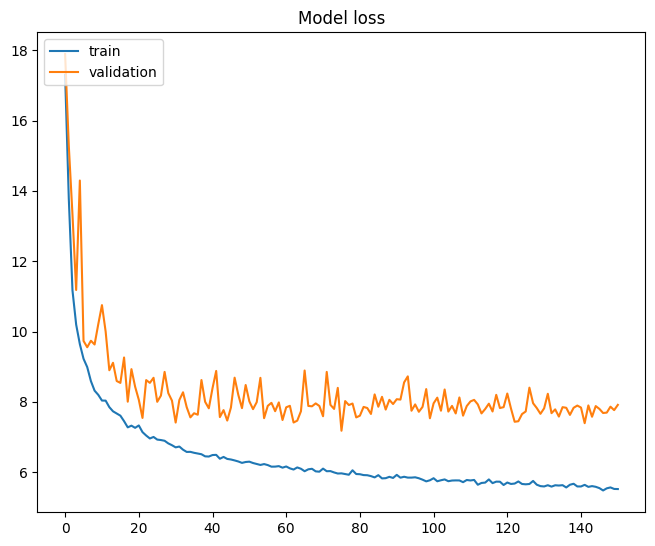

In [30]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.xlabel=('Epoch')
plt.ylabel=('loss')
plt.legend(['train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


# Plotting sex_out_accuracy

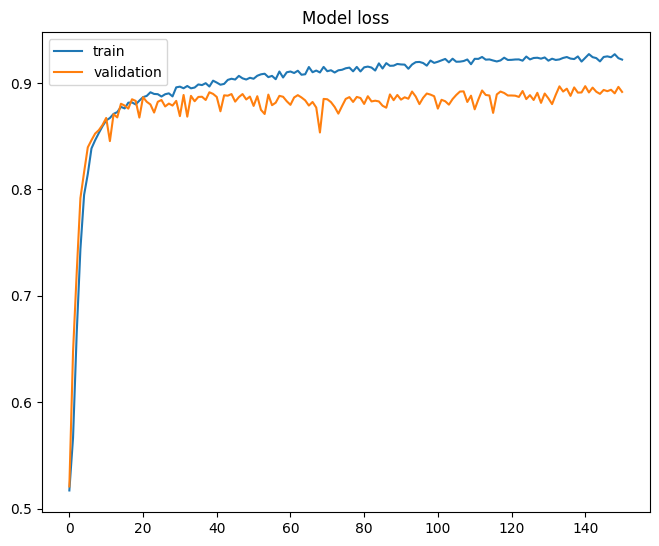

In [31]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model loss')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

<function matplotlib.pyplot.show(close=None, block=None)>

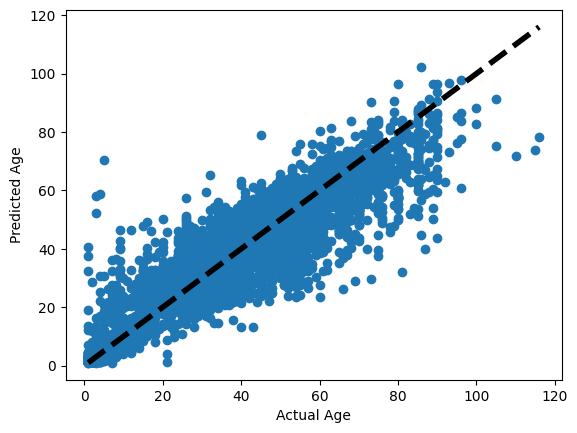

In [32]:
fig,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show

In [33]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\anshu yadav\AppData\Local\Temp\ipykernel_22540\4197083195.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


# Making report of the model 

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [35]:
report=classification_report(y_test_2[0],Pred_l)

In [36]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3087
           1       0.88      0.88      0.88      2840

    accuracy                           0.89      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.89      0.89      0.89      5927



In [37]:
results=confusion_matrix(y_test_2[0],Pred_l)

# Heatmap for gender only

<Axes: >

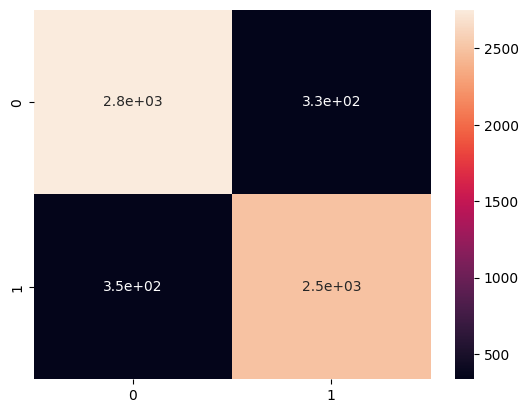

In [38]:
import seaborn as sns
sns.heatmap(results,annot=True)

# Testing the model 

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+str(age))
    print("Predicted gender is "+ sex_f[sex])

    

# Test 1 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Age is 88
Predicted gender is Female


C:\Users\anshu yadav\AppData\Local\Temp\ipykernel_22540\2299670750.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\anshu yadav\AppData\Local\Temp\ipykernel_22540\2299670750.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


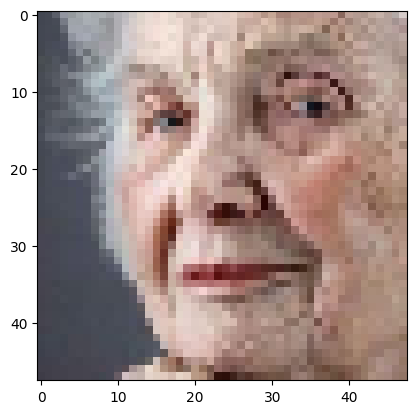

In [40]:
test_image(4,images_f,images_f_2,Model)

# Test 2 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Age is 13
Predicted gender is Female


C:\Users\anshu yadav\AppData\Local\Temp\ipykernel_22540\2299670750.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\anshu yadav\AppData\Local\Temp\ipykernel_22540\2299670750.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


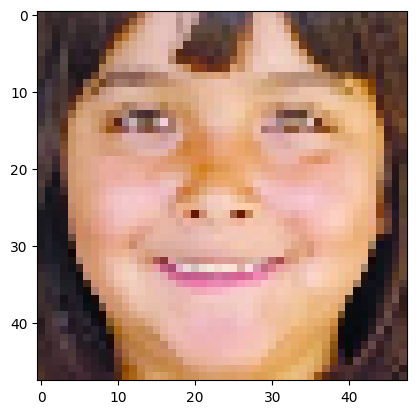

In [41]:
test_image(300,images_f,images_f_2,Model)

# Senior citizen identification model begins 

In [45]:
from datetime import datetime
import pandas as pd

# Load the trained model

In [ ]:
Model.load_weights('Age_Sex_Detection_2.h5')

In [ ]:
def predict_senior_citizen_by_index(image_index, images_f, images_f_2, Model):
    """Predict age and gender using an image from the dataset, and check if the person is a senior citizen."""
    
    # Get the test image from dataset
    image = images_f[image_index]  # Original image for display
    image_test = images_f_2[image_index]  # Preprocessed image for model
    
    # Make predictions
    gender_pred, age_pred = Model.predict(np.array([image_test]))
    gender = "Male" if np.round(gender_pred[0][0]) == 0 else "Female"
    age = int(np.round(age_pred[0][0]))

    # Check if senior citizen
    is_senior = age > 60
    print(f"Age: {age}, Gender: {gender}, Senior Citizen: {is_senior}")

    # Display the image
    plt.imshow(image)
    plt.title(f"Age: {age}, Gender: {gender}, Senior Citizen: {is_senior}")
    plt.axis("off")
    plt.show()

    # Save to CSV
    save_to_csv(age, gender, is_senior)



# Saving data into csv file

In [68]:
def save_to_csv(age, gender, is_senior):
    """Save the results to a CSV file."""
    data = {
        "Age": [age],
        "Gender": [gender],
        "Senior Citizen": [is_senior],
        "Time": [datetime.now().strftime("%Y-%m-%d %H:%M:%S")]
    }
    df = pd.DataFrame(data)
    df.to_csv("visitor_log.csv", mode="a", index=False, header=False)

# Test 1 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Age: 88, Gender: Female, Senior Citizen: True


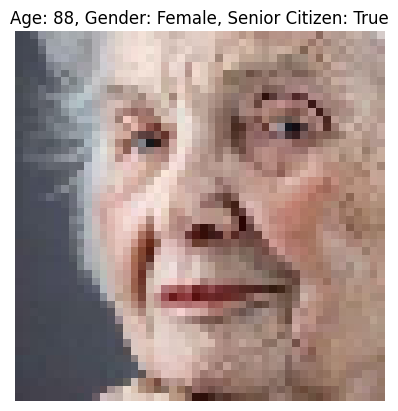

In [ ]:

predict_senior_citizen_by_index(4, images_f, images_f_2, Model)

# Test 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Age: 90, Gender: Male, Senior Citizen: True


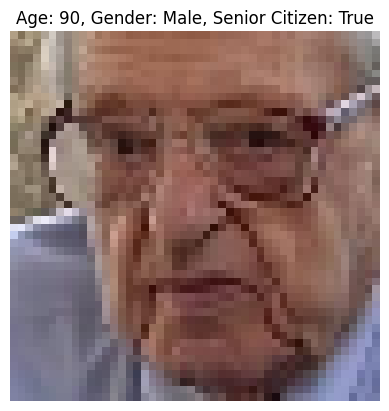

In [ ]:

predict_senior_citizen_by_index(14, images_f, images_f_2, Model)

# Test 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Age: 83, Gender: Female, Senior Citizen: True


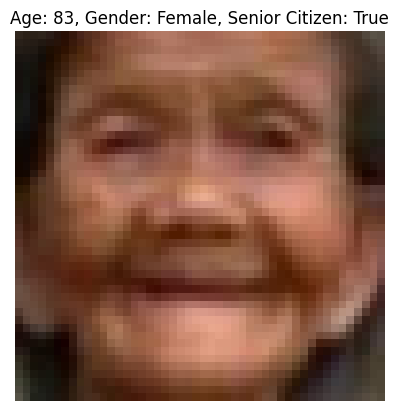

In [ ]:

predict_senior_citizen_by_index(8, images_f, images_f_2, Model)